<a href="https://colab.research.google.com/github/adilhussa/GitHATS/blob/master/Poisson_distribution_and_upper_limits_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To edit this notebook, you can do one of two things. 

1) You can use the "*Edit in Playground*" button above, but then you won't have your own copy. 

Or you can (preferred)

2) Save a copy in your own Google Drive (if you have a Google account)
* Go to **File** from the drop-down menu above. 
* Select **Save a copy in Drive**
* Edit and rename as you see fit!

# Poisson distribution

From [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)

*"In probability theory and statistics, the Poisson distribution, named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.* **The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.** (emphasis mine)


Let's try to come up with some sort of pedagogical example. 

Suppose I am watching cars drive by on a very deserted highway at night, and after collecting a huge amount of data I find that the odds of a car going by in a 1 minute interval, is only 2%. 

Now, let me ask you a question: *how many cars, on average, pass by in a 100 minute interval?* 

It's probably around 2, right? 2% per minute and 100 minutes? Well, let's run a simulation and see what we get!

In [ ]:
# Import some usual code. 

import numpy as np
import matplotlib.pylab as plt

In [ ]:
# Let's write a function to simulate our 100-minute interval.

# To do this, we'll simulate 100 1-minute intervals and test to 
# see if a car went by and keep track of the number of cars

def interval(num_sub_intervals=100, prob=0.02):

  ncars = 0
  # Generate 100 numbers between 0 and 1
  test_vals = np.random.random(num_sub_intervals)

  # Find out how many are less than the probability we're testing 
  ncars = len(test_vals[test_vals<prob])

  return ncars

In [ ]:
# Let's test it out!

# We know there will be 100 1-minute intervals in the overall 100-minute interval
ncars = interval(100)
print(ncars)

# You can run this cell multiple times to see if you get different answers

3


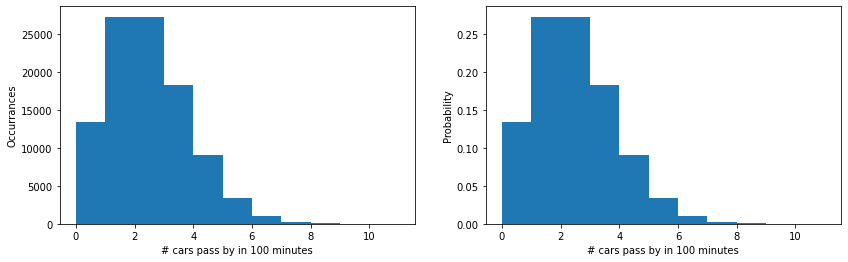

In [ ]:
# OK, let's run this simulation lots of times and see what the distribution looks like!

nsimulations = 100000

ncars_per_sim = []

for i in range(nsimulations):
  ncars = interval(100)
  ncars_per_sim.append(ncars)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.hist(ncars_per_sim,range=(0,11),bins=11)
plt.xlabel('# cars pass by in 100 minutes')
plt.ylabel('Occurrances');

plt.subplot(1,2,2)
# Plot the density (normalized)
plt.hist(ncars_per_sim,range=(0,11),bins=11,density=True)
plt.xlabel('# cars pass by in 100 minutes')
plt.ylabel('Probability');


This is a Poisson distribution with an expected number (average) of cars observed as 2. The analytic form of the distribution is given as follows:

$$P(\textrm{observe } k \textrm{ events}) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Where $\lambda$ is the average number we would expect, in the above case $\lambda=2$. 

We can use the ```scipy.stats``` module to plot the Poisson distribution, rather than relying on our pedagogical simulation. 



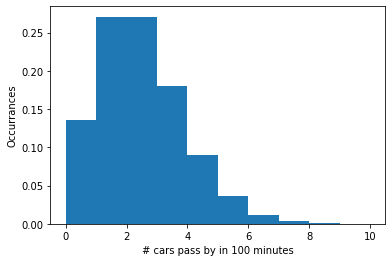

In [ ]:
import scipy.stats as stats

pdf = stats.poisson(2)

plt.figure()
x = np.linspace(0,11,12)
plt.hist(x,weights=pdf.pmf(x),bins=10,range=(0,10),histtype=r'stepfilled',linewidth=4)
plt.xlabel('# cars pass by in 100 minutes')
plt.ylabel('Occurrances');


We can also use the function to find the probability of observing some number of events, 
given some average value. 

In [ ]:
# Observe 2 events, given an average value of 2
obs = 2
ave = 2
prob = stats.poisson.pmf(obs,ave)
print("The probability of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,prob))

The probability of observing 2 events given an average of 2 is 0.271


In [ ]:
# Observe 4 events, given an average value of 2
obs = 4
ave = 2
prob = stats.poisson.pmf(obs,ave)
print("The probability of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,prob))

The probability of observing 4 events given an average of 2 is 0.0902


In [ ]:
# Observe 0 events, given an average value of 2
obs = 0
ave = 2
prob = stats.poisson.pmf(obs,ave)
print("The probability of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,prob))

The probability of observing 0 events given an average of 2 is 0.135


# Upper limits

Given a non-observation, the challenge of estimating an upper limit is non-trivial! And there's no unique approach. However, to get some sort of understanding of how to think about this, let's try to use Poisson statistics to estimate the upper limit on a null result. 

For the following discussion we are not going to worry about systematics. Don't tell anyone! :)

You've run your experiment/analysis and you expect 0 background. Nice! What's your upper limit at the 95% confidence level? 

Note that the Universe could "want" to produce 1 event, on average, for the time interval in which you collected data, but if the process is Poisson in nature, then there is a probability that you would have observed 0 events. How unlucky! What is that probability? 


In [ ]:
# Your code here

# Observe 0 events, given an average value of 1
obs = 0
ave = 1
prob = stats.poisson.pmf(obs,ave)
print("The probability of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,prob))

The probability of observing 0 events given an average of 1 is 0.368


Note that the Universe could "want" to produce 2 events, on average, for the time interval in which you collected data, but if the process is Poisson in nature, then there is a probability that you would have observed 0 events. How unlucky! What is that probability?

In [ ]:
# Your code here

# Observe 0 events, given an average value of 2
obs = 0
ave = 2
prob = stats.poisson.pmf(obs,ave)
print("The probability of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,prob))

The probability of observing 0 events given an average of 2 is 0.135


Calculate these probabilities, up to the situation where the Universe "wants" to produce 10 events on average but you observe 0. If you sum up all these probabilities, what do you get? 

In [ ]:
# Your code here

total_prob = 0

obs = 0
for ave in range(1,11):
  prob = stats.poisson.pmf(obs,ave)
  print("The probability of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,prob))
  total_prob += prob

print("The total probability is {0:.3}".format(total_prob))

The probability of observing 0 events given an average of 1 is 0.368
The probability of observing 0 events given an average of 2 is 0.135
The probability of observing 0 events given an average of 3 is 0.0498
The probability of observing 0 events given an average of 4 is 0.0183
The probability of observing 0 events given an average of 5 is 0.00674
The probability of observing 0 events given an average of 6 is 0.00248
The probability of observing 0 events given an average of 7 is 0.000912
The probability of observing 0 events given an average of 8 is 0.000335
The probability of observing 0 events given an average of 9 is 0.000123
The probability of observing 0 events given an average of 10 is 4.54e-05
The total probability is 0.582


OK, now go back and see how "high" you have to go in summing up these hypothesis about the Universe before you cover 90% of the possible probability for 0. 

In [ ]:
# Your code here

obs = 0
partial_total_prob = 0

for ave in range(1,11):
  prob = stats.poisson.pmf(obs,ave)
  partial_total_prob += prob/total_prob
  print("The sum of the probabilities of observing {0} events given an average of {1} is {2:.3}".format(obs,ave,partial_total_prob))

  if partial_total_prob>=0.95:
    break

The sum of the probabilities of observing 0 events given an average of 1 is 0.632
The sum of the probabilities of observing 0 events given an average of 2 is 0.865
The sum of the probabilities of observing 0 events given an average of 3 is 0.95


Check your answer with Table 39.3 in the [PDG review on Statistics](https://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf)!